In [1]:
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

/home/conquestace/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "



# Solution of Eqns in One Variable
The growth of a pop. can be ofte modeled over short periods of time, by assuming tht the pop. grows continiously with time at a rate proportional to the number present at that time. Suppose that $N(t)$ denotes the number in the pop. at time *t* and $\lambda$ denotes the constant birth rate of the pop Then the pop. satisfies the diff eqn :

$$
 \frac{dN(t)}{dt} =  \lambda N(t)
$$

whose sol. is $N(t) = N_0 e^{\lambda t}$, where $N_0$ denotes initial pop.



### 2.1 Bisection Method


Root found: 1.324717957060784


/tmp/ipykernel_8082/3948173435.py:55: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of len(frames)=33.
  ani = FuncAnimation(fig, update, frames=steps, init_func=init, blit=True, repeat=True, save_count=50)


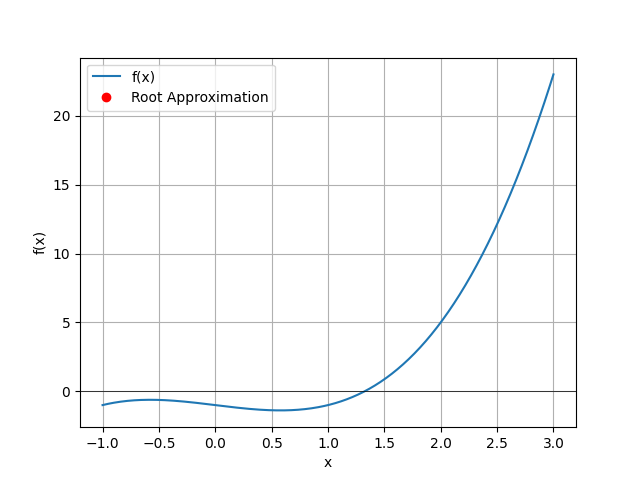

In [8]:
def f(x):
    return x**3 - x - 1

def validate_interval(f, x0, x1):
    return f(x0) * f(x1) < 0

def error_bound(a, b, err):
    n = np.log((b - a) / err) / np.log(2)
    return int(np.ceil(n))

def bisection(f, interval, tol):
    x0, x1 = interval[0], interval[1]
    if not validate_interval(f, x0, x1):
        print("Invalid interval for the bisection method.")
        return None, None

    steps = []
    n = error_bound(x0, x1, tol)
    while True:
        root_approx = x0 + (x1 - x0) / 2
        y = f(root_approx)
        steps.append((x0, x1, root_approx))
        
        if -tol < y < tol:
            return steps, root_approx
        
        if validate_interval(f, x0, root_approx):
            x1 = root_approx
        else:
            x0 = root_approx

# Generate the steps for the animation
steps, root = bisection(f, [-1, 3], 1e-9)
print(f"Root found: {root}")

# Set up the figure and axis
fig, ax = plt.subplots()
x = np.linspace(-1, 3, 400)
y = f(x)
ax.plot(x, y, label='f(x)')
ax.axhline(0, color='black', linewidth=0.5)
line, = ax.plot([], [], 'ro', label='Root Approximation')

def init():
    line.set_data([], [])
    return line,

def update(step):
    x0, x1, root_approx = step
    line.set_data([root_approx], [f(root_approx)])
    ax.set_title(f'Bisection Method: Interval [{x0:.6f}, {x1:.6f}]')
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=steps, init_func=init, blit=True, repeat=True, save_count=50)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
import numpy as np

def f(x):
    return x**3 +4*x**2 -10
def error_bound(a,b,err):
    n=np.log((b-a)/err) / np.log(2)
    print(n)
    return int(np.ceil(n))


def bisection(f, a, b, tol):
    i=1
   
    n = error_bound(a, b, tol)
    while i <= n:
        p = a + ((b-a)/2)
       
        if f(p) == 0 or (b-a)/2 < tol:
            print(i, p)
            return p
        if f(a)*f(p) > 0:
            a = p
          
        else:
            b=p
        i+=1
    return

bisection(f,1,2,0.0001)


13.28771237954945
14 1.36517333984375


1.36517333984375

### 2.2 Fixed Pt Iteration
The number *p* is a fixed pt for a given fn $g$ if $g(p)= p$

Same as the roots of the fn $f(x)=x-g(x)$

this one sucks wtf, they try to find p = g(p) and u have to give what p_0 is?

### 2.3 Newton's Method
- used for root finding
- based on taylor polynomials

Suppose that $f \in C^2[a,b]$ Let $p_0 \in [a,b]$ be an approx to $p$ s.t $f'(p_0) \neq 0$ and $|p-p_0|$  is small. Consider the first Taylor polynomial for $f(x)$ expanded about $p_0$ and evaluated at $x=p$:

$$
f(p) = f(p_0) + (p-p_0)f'(p_0)+\frac{(p-p_0)^2}{2}f''(\xi (p))
$$
where $\xi (p)$ lies between $p$ and $p_0$ . Since $f(p) = 0$ , this eqn gives:

$$
0 = f(p_0) + (p-p_0)f'(p_0) + \frac{(p-p_0)^2}{2} f''(\xi (p)).
$$

Assuming $|p-p_0|$ is small, $|p-p_0|^2$ is much smaller, so

$$
0 \approx f(p_0) + (p-p_0)f'(p_0)
$$

and solving for $p$ gives:

$$
p \approx p_0 - \frac{f(p_0)}{f'(p_0)} \equiv p_1
$$

This sets the background for Newton's method, which starts with an initial approx $p_0$ and generates the sequence $\{p_n\}^\infty_{n=0}$, by:

$$
p_n = p_{n-1} - \frac{f(p_{n-1})}{f'(p_{n-1})}, \quad \text{for} \ n \geq 1
$$



In [4]:
def f(x):
    return np.cos(x)-x

def df(x):
    return -1*np.sin(x) -1

def Newton(f, p_0, tol, N):
    i = 1
    while i <= N:
        p = p_0 - f(p_0)/df(p_0)
        if np.absolute(p-p_0) < tol:
            return p
        i += 1
        p_0 = p
    print("couldn't find after", i , "iterations")

Newton(f,np.pi/4, 0.001, 5)

0.7390851781060102

Root found: 0.7390851781060102


/tmp/ipykernel_8082/577743455.py:44: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of len(frames)=3.
  ani = FuncAnimation(fig, update, frames=steps, init_func=init, blit=True, repeat=True, save_count=50)


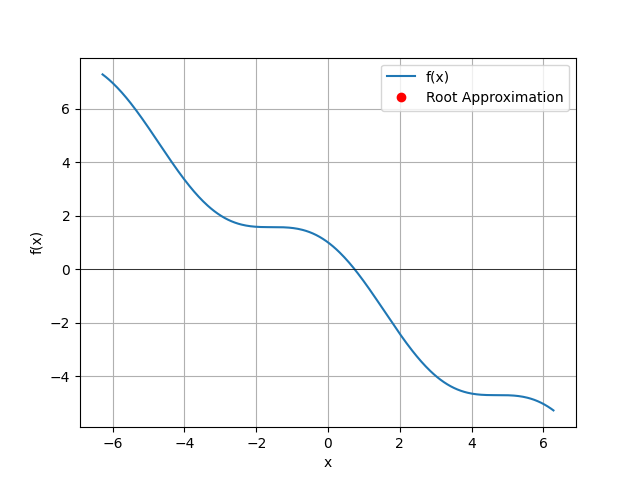

In [9]:
def f(x):
    return np.cos(x) - x

def df(x):
    return -np.sin(x) - 1

def Newton(f, df, p_0, tol, N):
    steps = []
    i = 1
    while i <= N:
        p = p_0 - f(p_0) / df(p_0)
        steps.append(p_0)
        if np.absolute(p - p_0) < tol:
            steps.append(p)
            return steps, p
        i += 1
        p_0 = p
    print("Couldn't find after", i, "iterations")
    return steps, None

# Generate the steps for the animation
initial_guess = np.pi / 4
steps, root = Newton(f, df, initial_guess, 0.001, 5)
print(f"Root found: {root}")

# Set up the figure and axis
fig, ax = plt.subplots()
x = np.linspace(-2*np.pi, 2*np.pi, 400)
y = f(x)
ax.plot(x, y, label='f(x)')
ax.axhline(0, color='black', linewidth=0.5)
line, = ax.plot([], [], 'ro', label='Root Approximation')

def init():
    line.set_data([], [])
    return line,

def update(p_0):
    line.set_data([p_0], [f(p_0)])
    ax.set_title(f'Newton\'s Method: p = {p_0:.6f}')
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=steps, init_func=init, blit=True, repeat=True, save_count=50)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()